In [37]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
equipos = pd.read_csv("./enunciado_tablas/enunciado_equipos.csv")
jugadores_atributos = pd.read_csv("./enunciado_tablas/enunciado_jugadores_atributos.csv")
jugadores = pd.read_csv("./enunciado_tablas/enunciado_jugadores.csv")
liga = pd.read_csv("./enunciado_tablas/enunciado_liga.csv")
paises = pd.read_csv("./enunciado_tablas/enunciado_paises.csv")
partidos = pd.read_csv("./enunciado_tablas/enunciado_partidos.csv")

SOLO TIENE team_fifa_api_id con NaN

In [5]:
equipos.isna().sum()

team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

DATE NO TIENE NaN

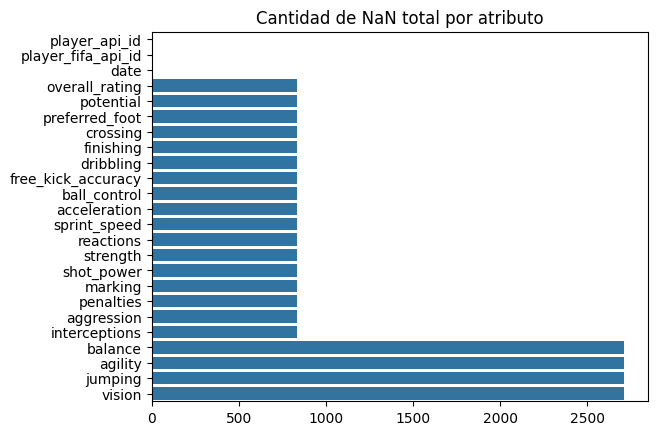

In [38]:
data = jugadores_atributos.isna().sum()
data = data.sort_values()
sb.barplot(data, orient="h")
plt.title("Cantidad de NaN total por atributo")
plt.show()

In [7]:
# JUGADORES NO TIENE NaN -> GOD
jugadores.isna().sum()

player_api_id    0
player_name      0
birthday         0
height           0
weight           0
dtype: int64

In [8]:
# LIGA NO TIENE NaN -> GOD
liga.isna().sum()

country_code    0
name            0
country_id      0
dtype: int64

In [9]:
# PAISES NO TIENE NaN -> GOD
paises.isna().sum()

country_code    0
name            0
id              0
dtype: int64

In [10]:
partidos.isna().sum()

country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_1        1224
home_player_2        1315
home_player_3        1281
home_player_4        1323
home_player_5        1316
home_player_6        1325
home_player_7        1227
home_player_8        1309
home_player_9        1273
home_player_10       1436
home_player_11       1555
away_player_1        1234
away_player_2        1278
away_player_3        1293
away_player_4        1321
away_player_5        1335
away_player_6        1313
away_player_7        1235
away_player_8        1341
away_player_9        1328
away_player_10       1441
away_player_11       1554
goal                11762
shoton              11762
shotoff             11762
foulcommit          11762
card                11762
cross               11762
corner      

# Vamos a ver que pasa por tiempo
para definir el criterio con NaN, sólo nos interesa ver
- _jugadores\_atributos_
- _jugadores_
- _partidos_

In [14]:
jugadores_atributos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   player_api_id       183978 non-null  int64  
 1   player_fifa_api_id  183978 non-null  int64  
 2   date                183978 non-null  object 
 3   overall_rating      183142 non-null  float64
 4   potential           183142 non-null  float64
 5   preferred_foot      183142 non-null  object 
 6   crossing            183142 non-null  float64
 7   finishing           183142 non-null  float64
 8   dribbling           183142 non-null  float64
 9   free_kick_accuracy  183142 non-null  float64
 10  ball_control        183142 non-null  float64
 11  acceleration        183142 non-null  float64
 12  sprint_speed        183142 non-null  float64
 13  agility             181265 non-null  float64
 14  reactions           183142 non-null  float64
 15  balance             181265 non-nul

In [26]:
jugadores_atributos["date"]

0        2016-02-18
1        2015-11-19
2        2015-09-21
3        2015-03-20
4        2007-02-22
            ...    
183973   2009-08-30
183974   2009-02-22
183975   2008-08-30
183976   2007-08-30
183977   2007-02-22
Name: date, Length: 183978, dtype: datetime64[ns]

In [16]:
jugadores_attr_clean = jugadores_atributos
jugadores_attr_clean["date"] = pd.to_datetime(jugadores_atributos["date"])
jugadores_attr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   player_api_id       183978 non-null  int64         
 1   player_fifa_api_id  183978 non-null  int64         
 2   date                183978 non-null  datetime64[ns]
 3   overall_rating      183142 non-null  float64       
 4   potential           183142 non-null  float64       
 5   preferred_foot      183142 non-null  object        
 6   crossing            183142 non-null  float64       
 7   finishing           183142 non-null  float64       
 8   dribbling           183142 non-null  float64       
 9   free_kick_accuracy  183142 non-null  float64       
 10  ball_control        183142 non-null  float64       
 11  acceleration        183142 non-null  float64       
 12  sprint_speed        183142 non-null  float64       
 13  agility             181265 no

In [25]:
print(jugadores_attr_clean["date"].max())
print(jugadores_attr_clean["date"].min())

2016-07-07 00:00:00
2007-02-22 00:00:00


In [28]:
# separo por años, y veo de contar los NaN
jugadores_attr_grouped = jugadores_attr_clean.groupby(jugadores_attr_clean["date"].dt.year)
# che, esto es muy clave
# defino la clave "año" y luego el valor "group", que es el dataframe de cada grupo
jugadores_attr_by_year = {year: group for year, group in jugadores_attr_grouped}

In [30]:
years = []
nans = []
for key in jugadores_attr_by_year.keys():
    years.append(key) 
    nans.append(jugadores_attr_by_year[key].isna().sum().sum())

nans_por_año_jugadores_attr = pd.DataFrame({"Year":years, "NaNCount":nans})
nans_por_año_jugadores_attr

,Year,NaNCount
0,2007,18640
1,2008,1730
2,2009,1879
3,2010,946
4,2011,168
5,2012,147
6,2013,777
7,2014,336
8,2015,336
9,2016,105


CONCLUSIÓN:
En base al criterio de ver cuantos NaN hay, lo mejor es usar las últimas 4 temporadas
¿Podemos ver cuantos NaN tiene cada atributo, y ver si me interesa?
Yes, we can